In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from google.colab import files

In [27]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving Expanded_data_with_more_features.csv to Expanded_data_with_more_features (1).csv


In [28]:
df.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [29]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


#The overall idea regarding the data is here

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [31]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [32]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# delete the unnamed column

In [33]:
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace('05-Oct','5-10')
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


#Change weekly study hours column

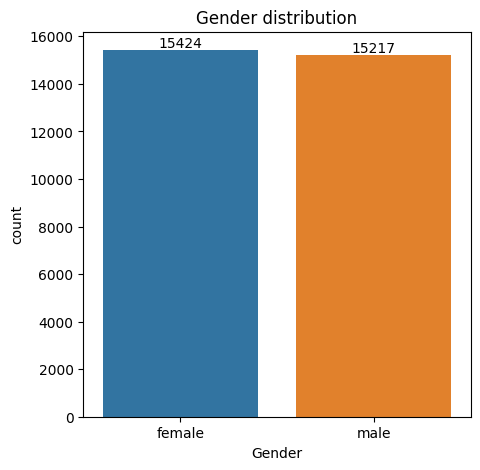

In [34]:
plt.figure(figsize =(5,5))
ax = sns.countplot(data = df, x = 'Gender')
plt.title("Gender distribution")
ax.bar_label(ax.containers[0])
plt.show()

#Gender distribution
#here we have analysed that number of females are more than that of males
> Indented block



In [35]:
gb = df.groupby('ParentEduc').agg({"MathScore" : 'mean',"WritingScore" : 'mean',"ReadingScore" :'mean'})
print(gb)

                    MathScore  WritingScore  ReadingScore
ParentEduc                                               
associate's degree  68.365586     70.299099     71.124324
bachelor's degree   70.466627     73.331069     73.062020
high school         64.435731     65.421136     67.213997
master's degree     72.336134     76.356896     75.832921
some college        66.390472     68.501432     69.179708
some high school    62.584013     63.632409     65.510785


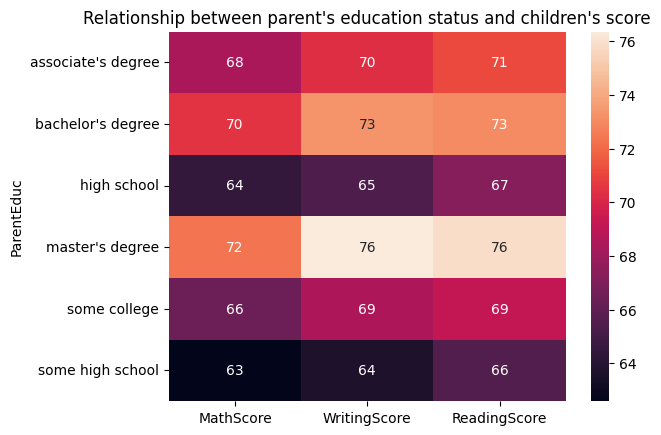

In [36]:
sns.heatmap(gb, annot = True)
plt.title("Relationship between parent's education status and children's score")
plt.show()

In [37]:
#From the above heatmap we can clearly conclude that parent's education has a clear impact on their child's marks

In [38]:
gc = df.groupby('ParentMaritalStatus').agg({"MathScore" : 'mean',"WritingScore" : 'mean',"ReadingScore" :'mean'})
print(gc)

                     MathScore  WritingScore  ReadingScore
ParentMaritalStatus                                       
divorced             66.691197     68.799146     69.655011
married              66.657326     68.420981     69.389575
single               66.165704     68.174440     69.157250
widowed              67.368866     68.563452     69.651438


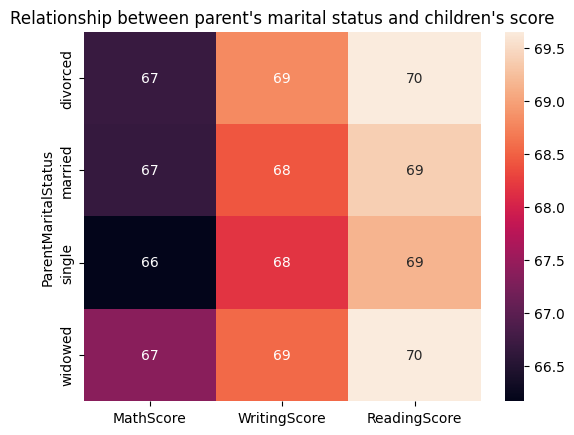

In [39]:
sns.heatmap(gc, annot = True)
plt.title("Relationship between parent's marital status and children's score")
plt.show()

In [40]:
# From the above plot we can conclude that parent's marital status doesn't have any influence on their child's marks

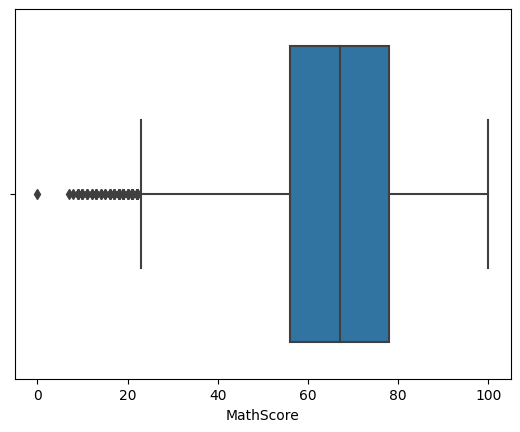

In [41]:
sns.boxplot(data = df, x= 'MathScore')
plt.show()

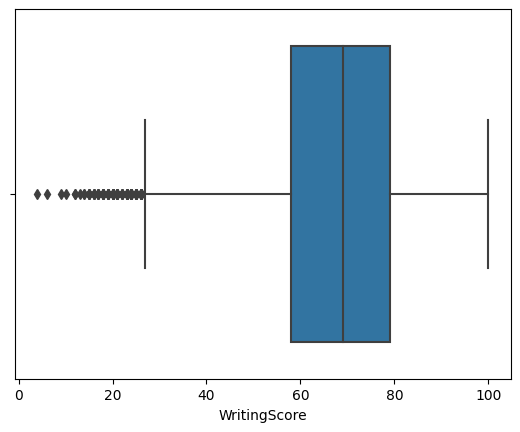

In [42]:
sns.boxplot(data = df, x= 'WritingScore')
plt.show()

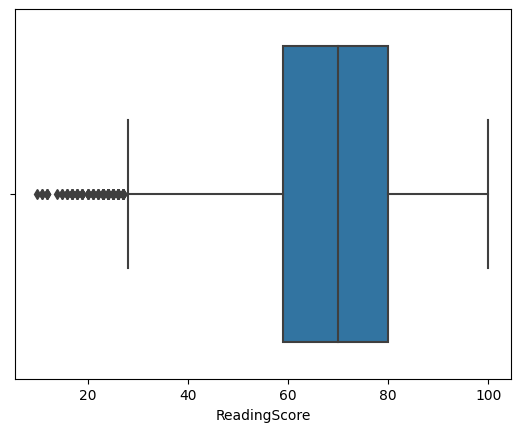

In [43]:
sns.boxplot(data = df, x= 'ReadingScore')
plt.show()

In [44]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [45]:
#Distribution of ethinic group

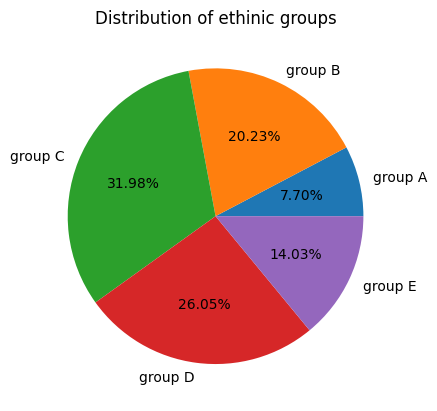

In [46]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()
l = ['group A','group B','group C','group D','group E']
mlist = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(mlist, labels =l , autopct ='%1.2f%%')
plt.title('Distribution of ethinic groups')
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

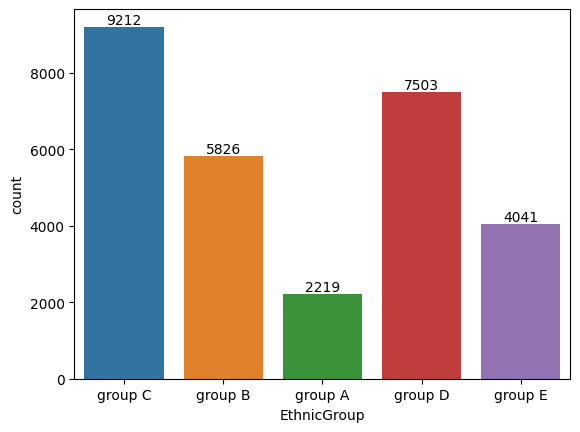

In [47]:
ax = sns.countplot(data = df, x ="EthnicGroup")
ax.bar_label(ax.containers[0])

In [48]:
print(df['PracticeSport'].unique())

['regularly' 'sometimes' 'never' nan]


In [49]:
gd = df.groupby('PracticeSport').agg({"MathScore" : 'mean',"WritingScore" : 'mean',"ReadingScore" :'mean'})
print(gd)

               MathScore  WritingScore  ReadingScore
PracticeSport                                       
never          64.171079     66.522727     68.337662
regularly      67.839155     69.604003     69.943019
sometimes      66.274831     68.072438     69.241307


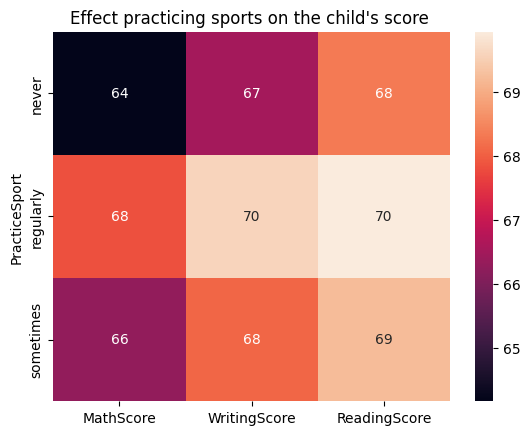

In [51]:
sns.heatmap(gd, annot = True)
plt.title("Effect practicing sports on the child's score ")
plt.show()

The child who practices sports have relatively better scores than the who doesn't, but the influence of sports is not very much

In [52]:
print(df['LunchType'].unique())

['standard' 'free/reduced']


In [53]:
gd = df.groupby('LunchType').agg({"MathScore" : 'mean',"WritingScore" : 'mean',"ReadingScore" :'mean'})
print(gd)

              MathScore  WritingScore  ReadingScore
LunchType                                          
free/reduced  58.862332     62.650522     64.189735
standard      70.709370     71.529716     72.175634


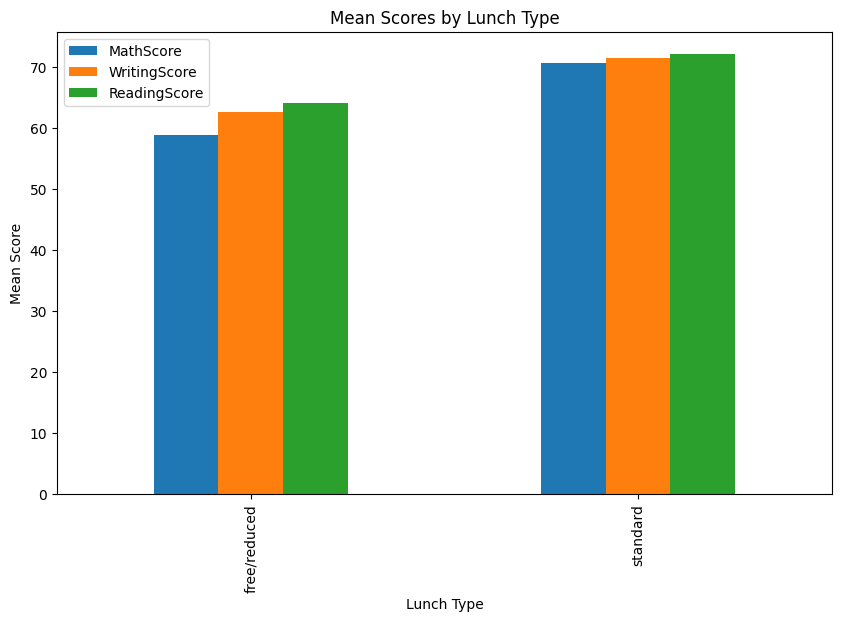

In [57]:


# Assuming 'gd' is your grouped DataFrame
gd = df.groupby('LunchType').agg({"MathScore": 'mean', "WritingScore": 'mean', "ReadingScore": 'mean'})

# Plotting
gd.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Scores by Lunch Type')
plt.ylabel('Mean Score')
plt.xlabel('Lunch Type')
plt.show()


In [ ]:
#The children with standard luchtype tend to perform better than others, this tells us the influence of food  in a child's score

In [60]:
ge = df.groupby('IsFirstChild').agg({"MathScore": 'mean', "WritingScore": 'mean', "ReadingScore": 'mean'})
print(ge)

              MathScore  WritingScore  ReadingScore
IsFirstChild                                       
no            66.246832     68.210887     69.132614
yes           66.740646     68.558484     69.542553


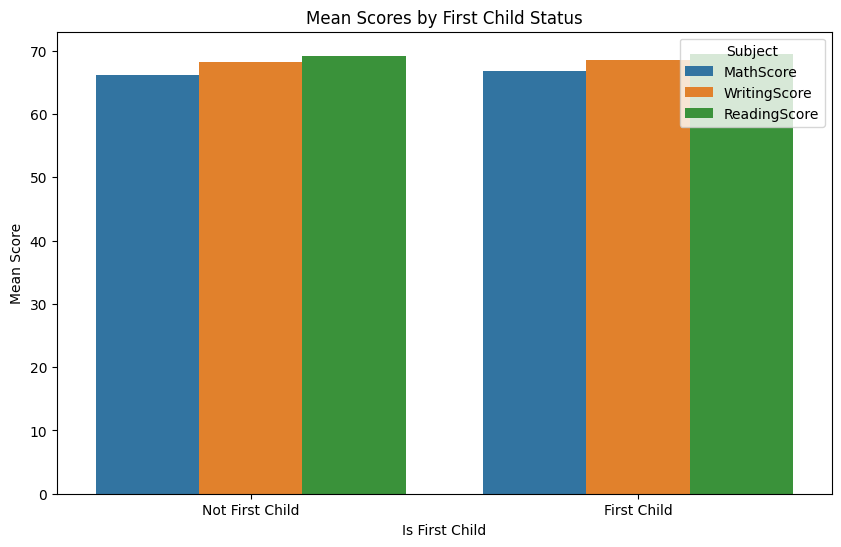

In [63]:


# Assuming 'ge' is your grouped DataFrame
ge = df.groupby('IsFirstChild').agg({"MathScore": 'mean', "WritingScore": 'mean', "ReadingScore": 'mean'}).reset_index()

# Melt the DataFrame to make it suitable for Seaborn
ge_melted = pd.melt(ge, id_vars='IsFirstChild', var_name='Subject', value_name='MeanScore')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='IsFirstChild', y='MeanScore', hue='Subject', data=ge_melted)
plt.title('Mean Scores by First Child Status')
plt.ylabel('Mean Score')
plt.xlabel('Is First Child')
plt.xticks([0, 1], ['Not First Child', 'First Child'])
plt.show()


# Bieng a first child or not doesn't influence the score of the child

```
# This is formatted as code
```



In [64]:
gf = df.groupby('NrSiblings').agg({"MathScore" : 'mean',"WritingScore" : 'mean',"ReadingScore" :'mean'})
print(gf)

            MathScore  WritingScore  ReadingScore
NrSiblings                                       
0.0         66.819449     68.746515     69.547812
1.0         66.473896     68.245345     69.259097
2.0         66.554934     68.522533     69.472018
3.0         66.719092     68.650498     69.488159
4.0         66.245495     68.073444     69.144169
5.0         66.630303     68.282576     69.453788
6.0         65.917219     67.860927     68.801325
7.0         67.615120     68.986254     69.828179


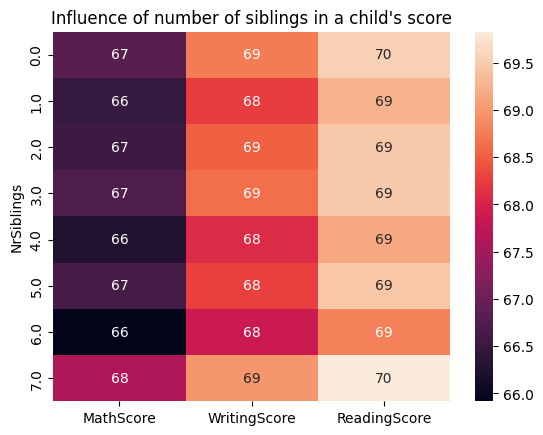

In [65]:
sns.heatmap(gf, annot = True)
plt.title("Influence of number of siblings in a child's score")
plt.show()

In [ ]:
#Here we cannot see any direct influence of number of sibling in a child's score,